## Income Classification Model

### **Project Scope:**

The adult income dataset is taken from UCI machine learning from which we can explore the possibility of predicting income level based on the individual’s personal information and classify them into various categories. The output of this exercise can be useful to keep government records to develop public policies related to taxation, welfare, and social security.

*Your Role:**

Build a classification model using **different classification models** to predict a income class into UCLA.


**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Admit_Chance 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 90% and above

### **Data Dictionary:**

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are : 

UCI machine learning which contains 14 attributes including:

**Input variables:**
age, workclass, fnlwgt, education, educational-num, marital status, occupation, relationship, race, gender

**Target variable:** Income

In [1]:
#Importing required libraries for model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline
import os

In [2]:
#importing warning function

import warnings
warnings.filterwarnings('ignore')

## 1) Exploratory Data Analysis

In [3]:
#Importing dataset of income evaluation and assigning 'df' as dataframe

df=pd.read_csv('Income_Eva.csv')

#### a) Get a description, general information, data types, and shape of the dataset

In [4]:
# examining first 5 records of the dataset

df.head()

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [5]:
# Modifying the names of the columns.

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
# Checking the new column names
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

#### b) Summary of dataset 

In [7]:
#checking the datatypes of each feature.

df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
# checking datatypes & null vales of each feature.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### c) Findings: Determine the frequency of distinct values for each feature in the dataset.

We can see that the dataset contains 9 character variables and 6 numerical variables. Income is the target variable.

In [9]:
# Statistical summary of numerical data (int64 & float64).

df.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [10]:
# Statistical summary of string (object) data

df.describe(include='object')

workclass education       marital_status       occupation relationship  \
count      32561     32561                32561            32561        32561   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          race    sex  native_country  income  
count    32561  32561           32561   32561  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27816  21790           29170   24720

#### d) Checking for null values

In [11]:
#checking the null vales of each feature.

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
# Assigning categorical variables with the categorical term.

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [13]:
# checking the first 5 records with only categorical columns.

df[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

#### e) Number of classes and counts

In [14]:
# checking the number classes and records of each categorical variable.

for var in categorical:
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

#### Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values.
 Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it does not consider ? as missing values.

So, We have to replace ? with NaN so that Python can detect these missing values.

I will explore these variables and replace ? with NaN. 

In [15]:
# Number of class in target varible (label)

df['income'].nunique()

2

In [16]:
# class in target varible (label) and their counts

df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

#### f) Visualizing the variables.

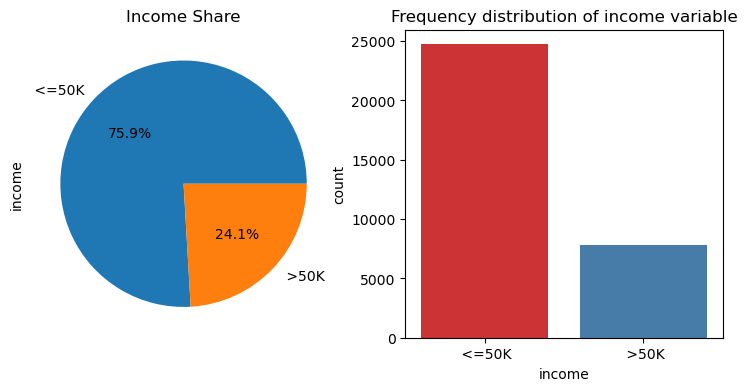

In [17]:
# Visualize frequency distribution of income variable (label)

f,ax=plt.subplots(1,2,figsize=(9,4))

ax[0] = df['income'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

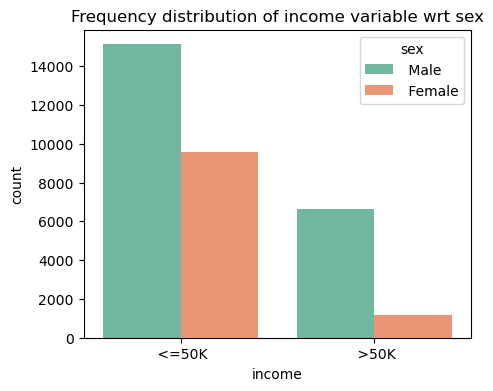

In [18]:
# Visualize frequency distribution of income variable (label) with respect to sex variable.

f, ax = plt.subplots(figsize=(5, 4))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

We can see that males make more money than females in both the income categories.

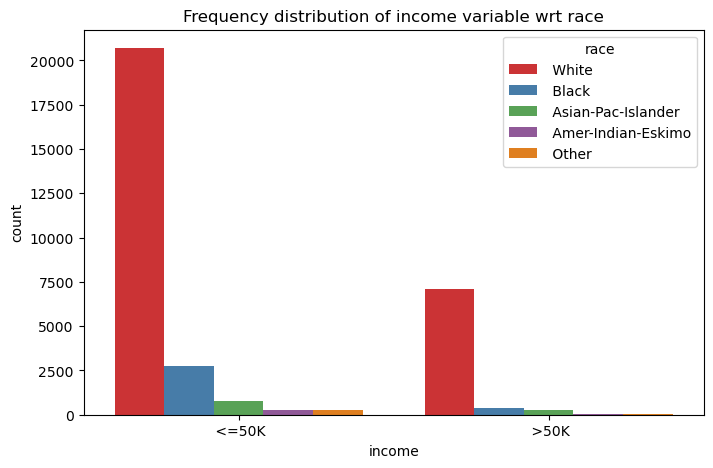

In [19]:
# Visualize frequency distribution of income variable (label) with respect to race variable.


f, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

We can see that whites make more money than non-whites in both the income categories.


#### g) Explore workclass variable

In [20]:
# number of class in 'workclass' variable.

df.workclass.nunique()

9

In [21]:
# classes in 'workclass' variable

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [22]:
# counts of each class in 'workclass' variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [23]:
# checking the shape of dataset

df.shape

(32561, 15)

We can see that there are 1836 values encoded as ? in workclass variable. I will replace these ? with NaN.


In [24]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace(' ?', np.NaN, inplace=True)

In [25]:
# checking the classes of 'workspace' to verify whether '?' is removed

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [26]:
# number of class in 'workclass' variable.

df.workclass.nunique()

8

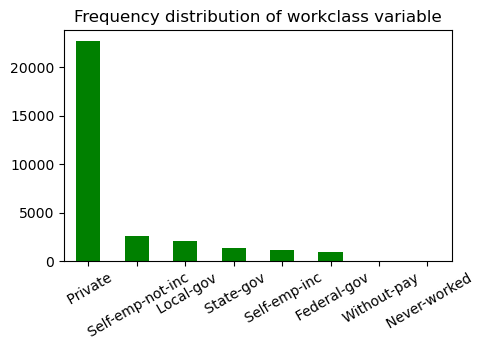

In [27]:
# Visualize frequency distribution of workclass variable.


f, ax = plt.subplots(figsize=(5, 3))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

We can see that there are lot more private workers than other category of workers.


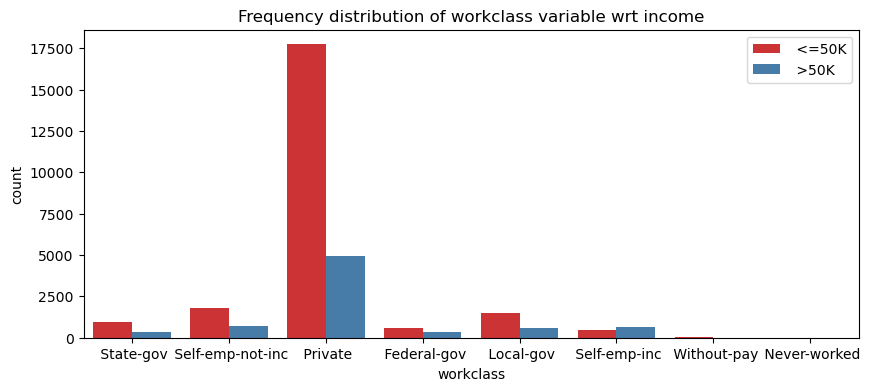

In [28]:
# Visualize frequency distribution of income variable (label) with respect to workclass variable.


f, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

We can see that workers make less than equal to 50k in most of the working categories.But this trend is more appealing in Private workclass category.

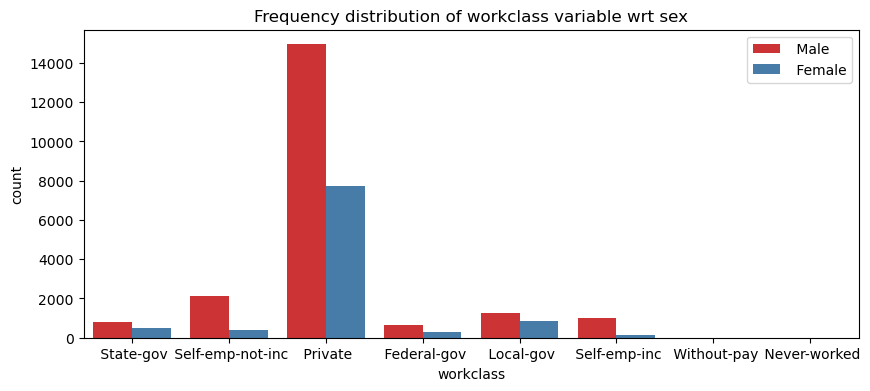

In [29]:
# Visualize frequency distribution of sex variable with respect to workclass variable.

f, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

We can see that there are more male workers than female workers in all the working category.

The trend is more appealing in Private sector.

#### h) Explore occupation variable

In [30]:
# classes and counts of occupation variable.

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [31]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace(' ?', np.NaN, inplace=True)

In [32]:
# again checking the frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

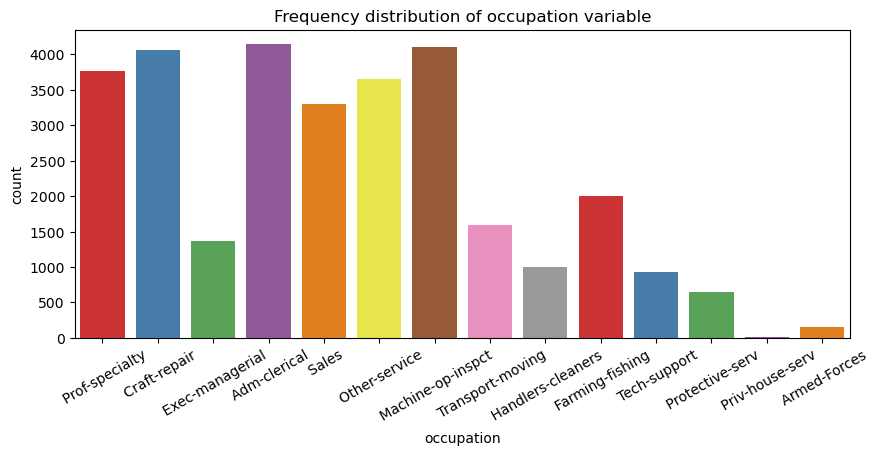

In [33]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(10, 4))
ax = sns.countplot(x="occupation", data=df, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

#### i) Explore country variable

In [34]:
# class and counts of native country variable.

df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [35]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace(' ?', np.NaN, inplace=True)

In [36]:
# again check the frequency distribution of values

df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

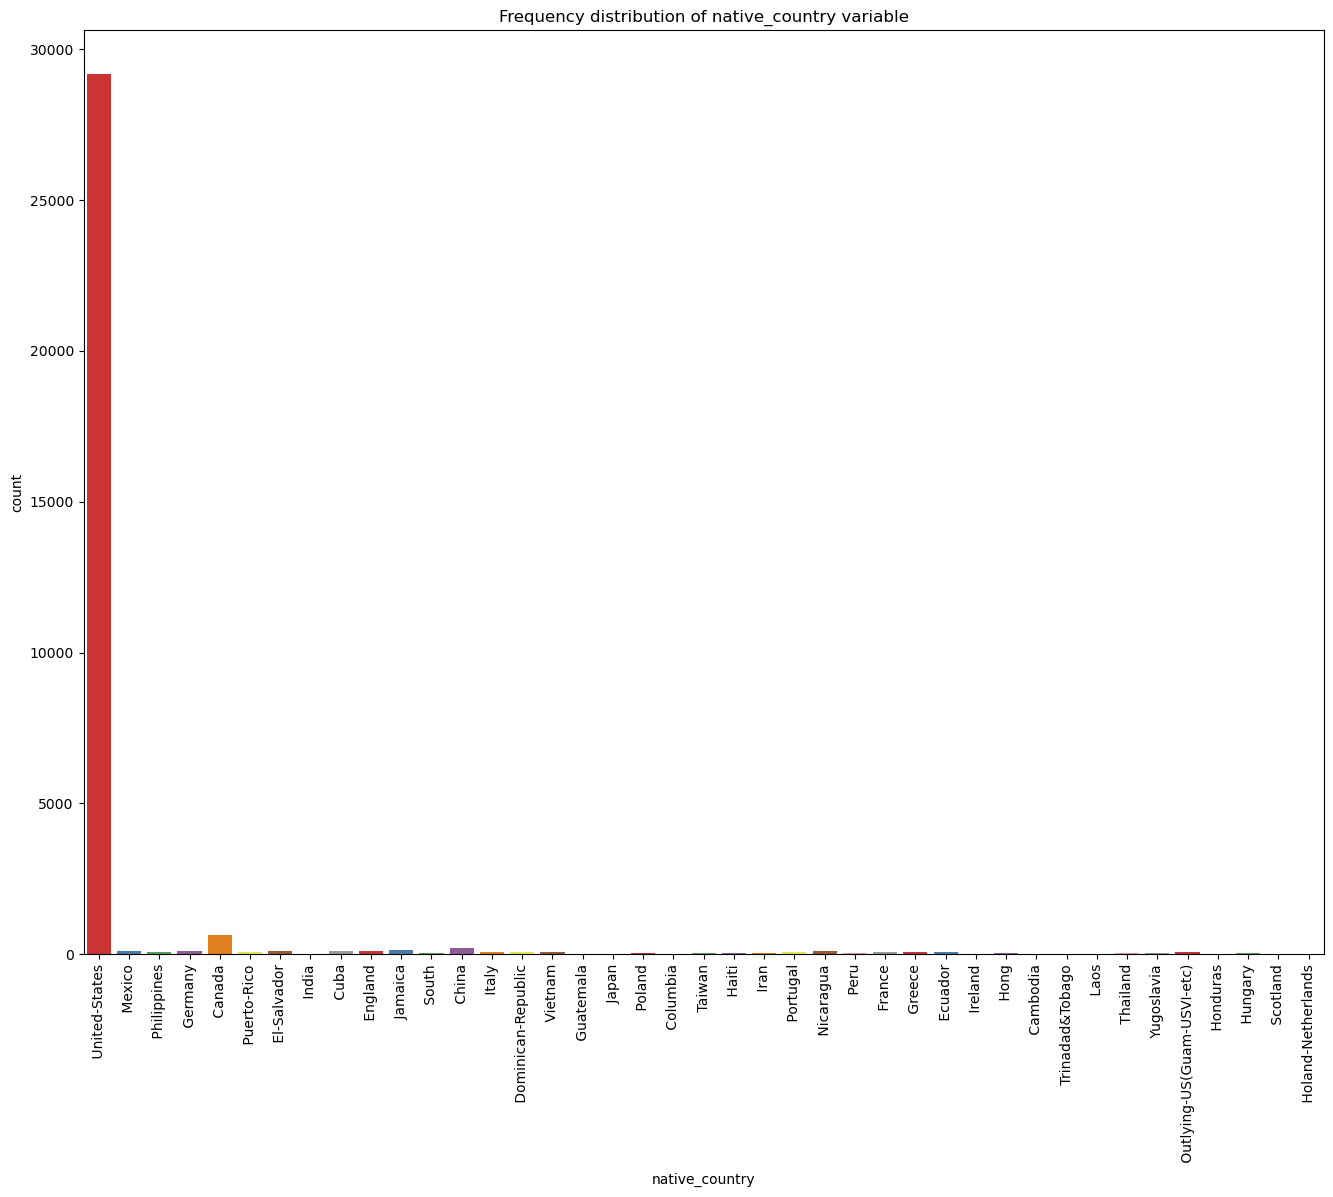

In [37]:

# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native_country", data=df, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

We can see that United-States dominate amongst the native_country variables.



#### j) Check categorical variables

In [38]:
# checking the missing values.

df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that workclass, occupation and native_country variable contains missing values.



Number of labels: Cardinality. The number of labels within a categorical variable is known as cardinality.

A high number of labels within a variable is known as high cardinality.
High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [39]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

#### k) Explore Numerical Variables

In [40]:
# check for numeric variables and assigning them

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [41]:
# first 5 records with only numerical variable columns

df[numerical].head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0   39   77516             13          2174             0              40
1   50   83311             13             0             0              13
2   38  215646              9             0             0              40
3   53  234721              7             0             0              40
4   28  338409             13             0             0              40

Summary of numerical variables

There are 6 numerical variables.

These are given by age, fnlwgt, education_num,capital_gain, capital_loss and hours_per_week. All of the numerical variables are of discrete data type

#### l) Check missing values in numerical variables

In [42]:
# Missing values of numerical variable.

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [43]:
# checking number of unique entries.

df['age'].nunique()

73

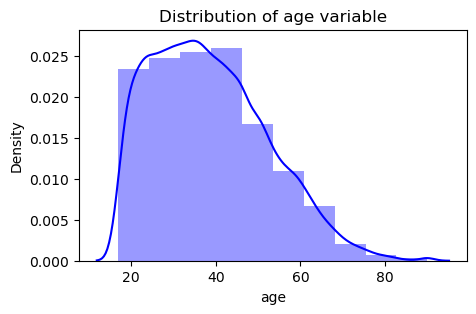

In [44]:
# visualizing the age distribution.

f, ax = plt.subplots(figsize=(5,3))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

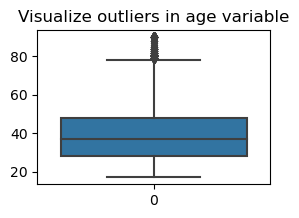

In [45]:
# Plotting and checking the outliers of agew variable.

f, ax = plt.subplots(figsize=(3,2))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

We can see that there are lots of outliers in age variable.

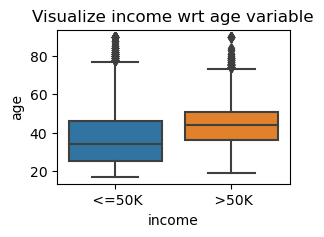

In [46]:
# Visualizing the outliers of age variable w.r.t income variable(label)

f, ax = plt.subplots(figsize=(3,2))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

As expected, younger people make less money as compared to senior people.


<Figure size 300x200 with 0 Axes>

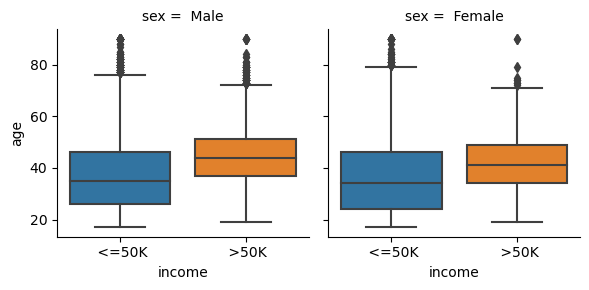

In [47]:
# Visualizing the outliers of sex variable w.r.t income variable(label)

plt.figure(figsize=(3,2))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=3, aspect=1)
plt.show()

Senior people make more money than younger people.


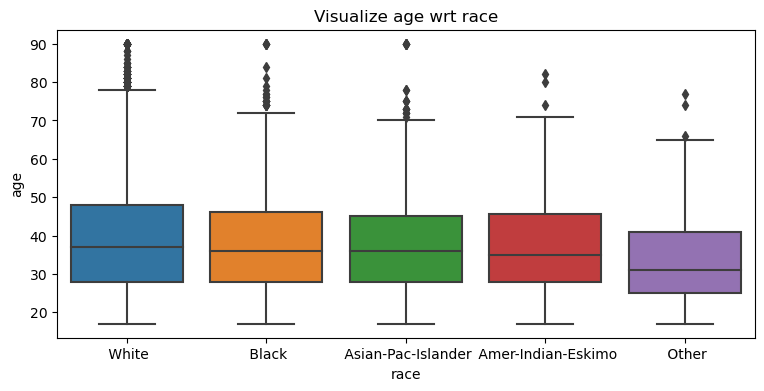

In [48]:
# Visualizing the outliers of race variable w.r.t income variable(label)

plt.figure(figsize=(9,4))
sns.boxplot(x ='race', y="age", data = df)
plt.title("Visualize age wrt race")
plt.show()

Whites are more older than other groups of people.


In [49]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

We can see that there is no strong correlation between variables.


#### m) Plot pairwise relationships in dataset

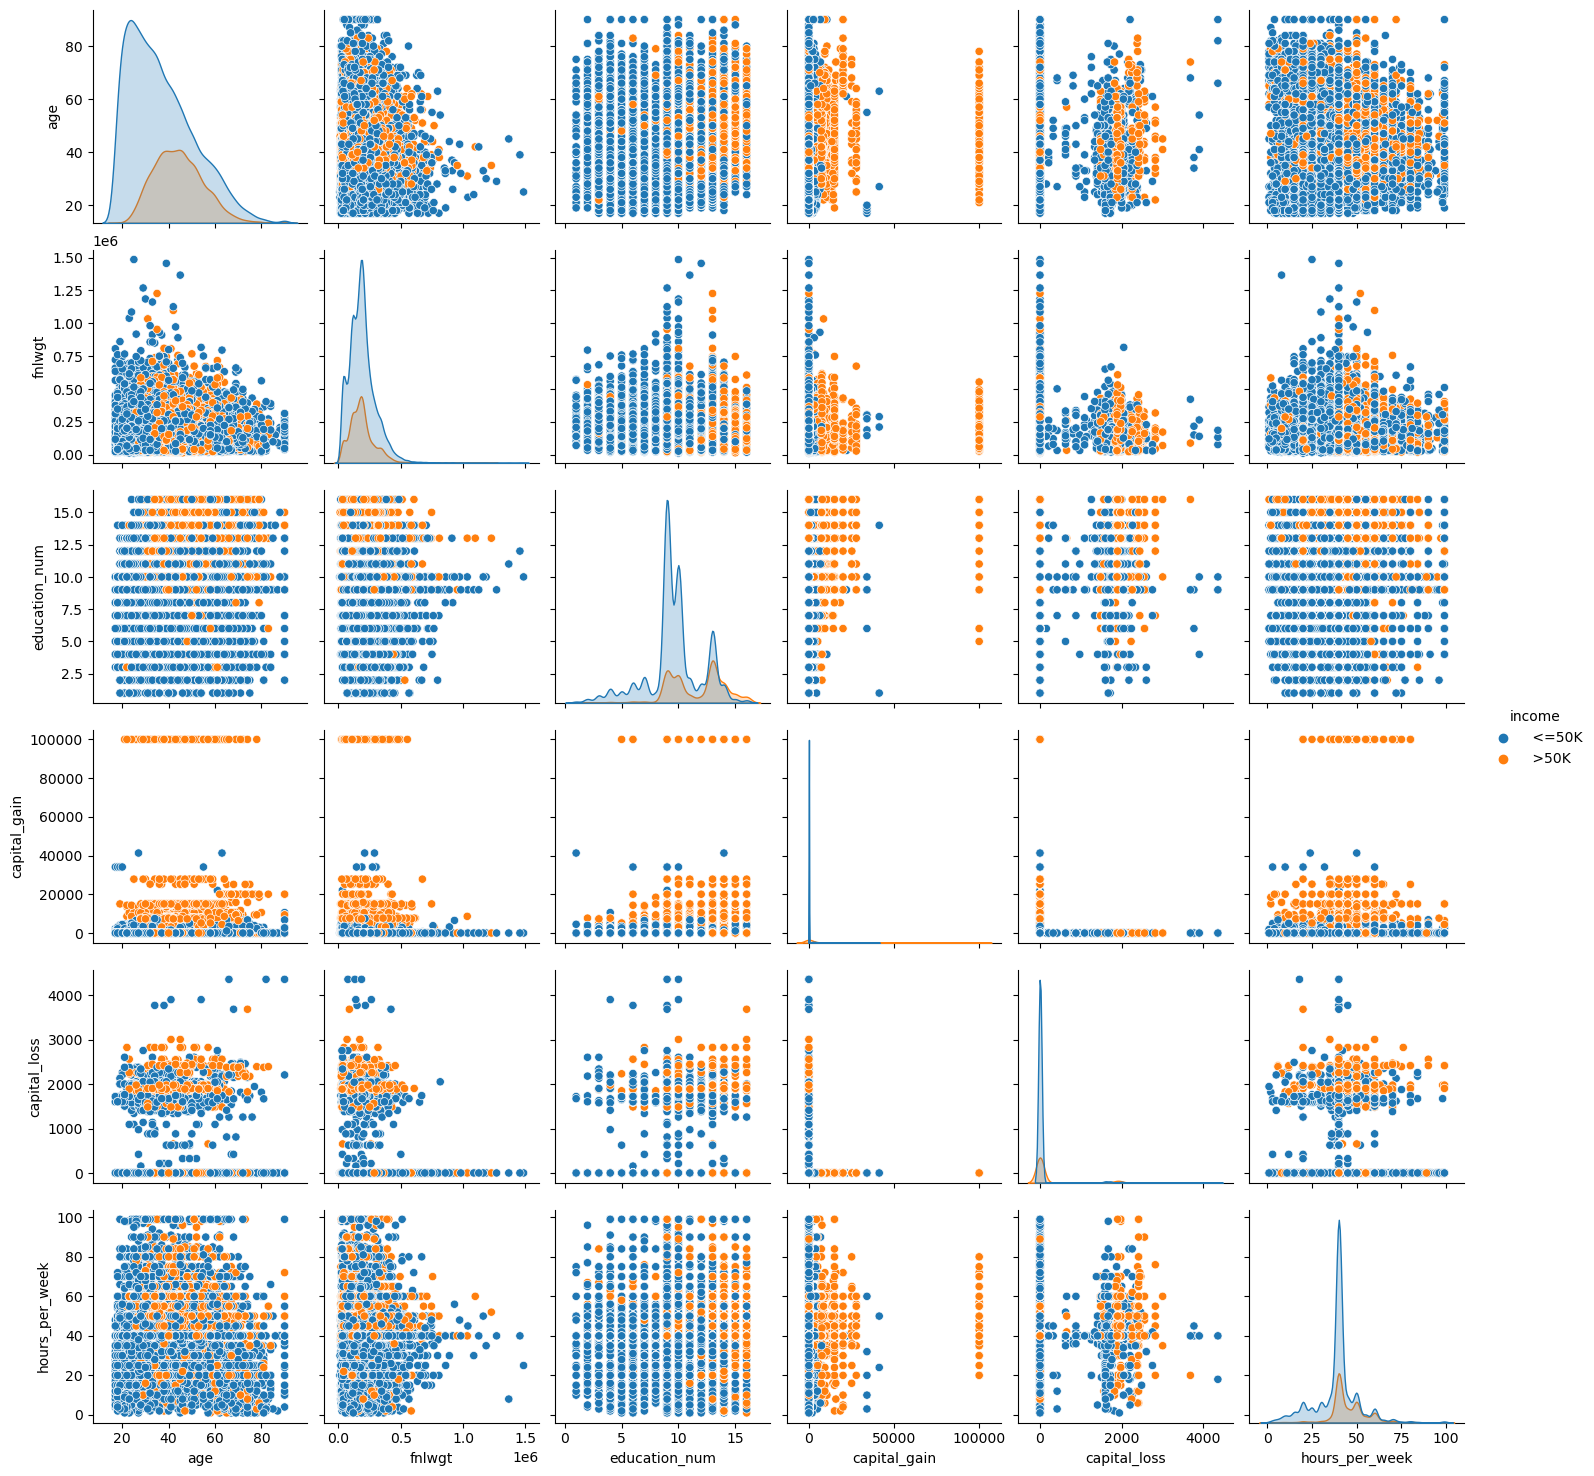

In [50]:
# visualizing the pairplot of all variables.

sns.pairplot(df, hue="income")
plt.show()

#### Interpretation
We can see that age and fnlwgt are positively skewed.

The variable education_num is negatively skewed while hours_per_week is normally distributed.

There exists weak positive correlation between capital_gain and education_num (correlation coefficient=0.1226).

#### n) Explore marital status variable

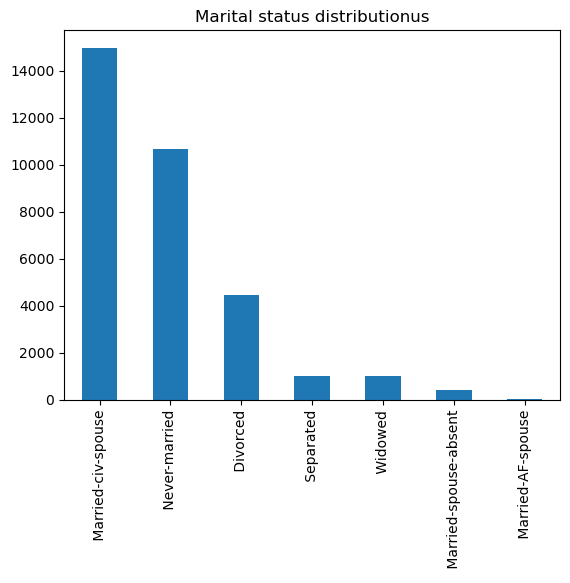

In [51]:
# visualize the marital status distribution.

df['marital_status'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('Marital status distributionus')
plt.show()

In [52]:
# checking the 5 records

df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

<Axes: xlabel='income', ylabel='marital_status'>

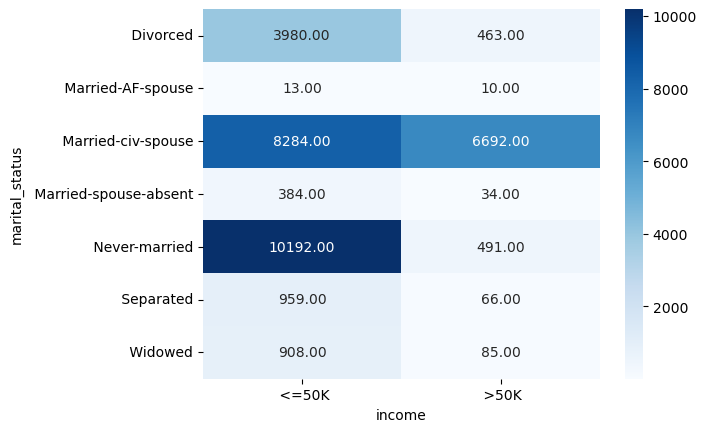

In [53]:
# Relationship bw marital status and income

table = pd.crosstab(df['marital_status'], df['income'])
sns.heatmap(table, annot=True, fmt='.2f', cmap='Blues')

In [54]:
# Top 5 records with only categorical values.

df[categorical].head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

### Imputing Missing values

#### o) Identifying Categorical Values

In [55]:
# listing feature names of categorical variables

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 9
Categorical columns:
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


#### p) Identifying Numerical  Values

In [56]:
# listing feature names of numerical variables

num_cols = [x for x in df.select_dtypes(include=["number"]).columns
            if x not in cat_cols
            if x not in [" income"]]
print(f"Number of numerical columns: {len(num_cols)}")
print(f"Numerical columns:\n{num_cols}")

Number of numerical columns: 6
Numerical columns:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [57]:
# checking null values

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

#### q) Filling NaN values

In [58]:
# Replacing null values with NaN 

from sklearn.impute import SimpleImputer

# create an imputer object
imputer = SimpleImputer(strategy='mean')

# impute NaN values in numeric columns
num_cols = num_cols
df[num_cols] = imputer.fit_transform(df[num_cols])

# impute NaN values in Categorical columns
imputer = SimpleImputer(strategy='most_frequent')

categorical_columns = cat_cols
df[categorical_columns] = imputer.fit_transform(df[cat_cols])

In [59]:
# checking null values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Standardization and normalization

In [60]:
# Importing labelencoder from sklearn library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode categorical variables
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [61]:
# value count check

df.value_counts().sum()

32561

In [62]:
le = LabelEncoder()

# encode the target variable (Label)
target = df['income']
df['income'] = le.fit_transform(df['income'])


In [63]:
# checking dataframe

df

age  workclass    fnlwgt  education  education_num  marital_status  \
0      39.0          6   77516.0          9           13.0               4   
1      50.0          5   83311.0          9           13.0               2   
2      38.0          3  215646.0         11            9.0               0   
3      53.0          3  234721.0          1            7.0               2   
4      28.0          3  338409.0          9           13.0               2   
...     ...        ...       ...        ...            ...             ...   
32556  27.0          3  257302.0          7           12.0               2   
32557  40.0          3  154374.0         11            9.0               2   
32558  58.0          3  151910.0         11            9.0               6   
32559  22.0          3  201490.0         11            9.0               4   
32560  52.0          4  287927.0         11            9.0               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               0             1     4    1        2174.0           0.0   
1               3             0     4    1           0.0           0.0   
2               5             1     4    1           0.0           0.0   
3               5             0     2    1           0.0           0.0   
4               9             5     2    0           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
32556          12             5     4    0           0.0           0.0   
32557           6             0     4    1           0.0           0.0   
32558           0             4     4    0           0.0           0.0   
32559           0             3     4    1           0.0           0.0   
32560           3             5     4    0       15024.0           0.0   

       hours_per_week  native_country  income  
0                40.0              38       0  
1                13.0              38       0  
2                40.0              38       0  
3                40.0              38       0  
4                40.0               4       0  
...               ...             ...     ...  
32556            38.0              38       0  
32557            40.0              38       1  
32558            40.0              38       0  
32559            20.0              38       0  
32560            40.0              38       1  

[32561 rows x 15 columns]

### Scaling the data with Min-Max Scaler

In [64]:
# Min Max Scaler: transformation of data to the range of 0 to 1

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled



age  workclass    fnlwgt  education  education_num  \
0      0.301370   0.857143  0.044302   0.600000       0.800000   
1      0.452055   0.714286  0.048238   0.600000       0.800000   
2      0.287671   0.428571  0.138113   0.733333       0.533333   
3      0.493151   0.428571  0.151068   0.066667       0.400000   
4      0.150685   0.428571  0.221488   0.600000       0.800000   
...         ...        ...       ...        ...            ...   
32556  0.136986   0.428571  0.166404   0.466667       0.733333   
32557  0.315068   0.428571  0.096500   0.733333       0.533333   
32558  0.561644   0.428571  0.094827   0.733333       0.533333   
32559  0.068493   0.428571  0.128499   0.733333       0.533333   
32560  0.479452   0.571429  0.187203   0.733333       0.533333   

       marital_status  occupation  relationship  race  sex  capital_gain  \
0            0.666667    0.000000           0.2   1.0  1.0      0.021740   
1            0.333333    0.230769           0.0   1.0  1.0      0.000000   
2            0.000000    0.384615           0.2   1.0  1.0      0.000000   
3            0.333333    0.384615           0.0   0.5  1.0      0.000000   
4            0.333333    0.692308           1.0   0.5  0.0      0.000000   
...               ...         ...           ...   ...  ...           ...   
32556        0.333333    0.923077           1.0   1.0  0.0      0.000000   
32557        0.333333    0.461538           0.0   1.0  1.0      0.000000   
32558        1.000000    0.000000           0.8   1.0  0.0      0.000000   
32559        0.666667    0.000000           0.6   1.0  1.0      0.000000   
32560        0.333333    0.230769           1.0   1.0  0.0      0.150242   

       capital_loss  hours_per_week  native_country  income  
0               0.0        0.397959            0.95     0.0  
1               0.0        0.122449            0.95     0.0  
2               0.0        0.397959            0.95     0.0  
3               0.0        0.397959            0.95     0.0  
4               0.0        0.397959            0.10     0.0  
...             ...             ...             ...     ...  
32556           0.0        0.377551            0.95     0.0  
32557           0.0        0.397959            0.95     1.0  
32558           0.0        0.397959            0.95     0.0  
32559           0.0        0.193878            0.95     0.0  
32560           0.0        0.397959            0.95     1.0  

[32561 rows x 15 columns]

### Setting target variable

In [65]:
# defining the input variables with 'x' and target variable with 'y'

Y = data_scaled['income']
X = data_scaled.drop(['income'], axis=1)

## 2) Feature Engineering
### Selecting best features using Pearsons Correlation and KBest Features.

#### a) Pearsons Correlation

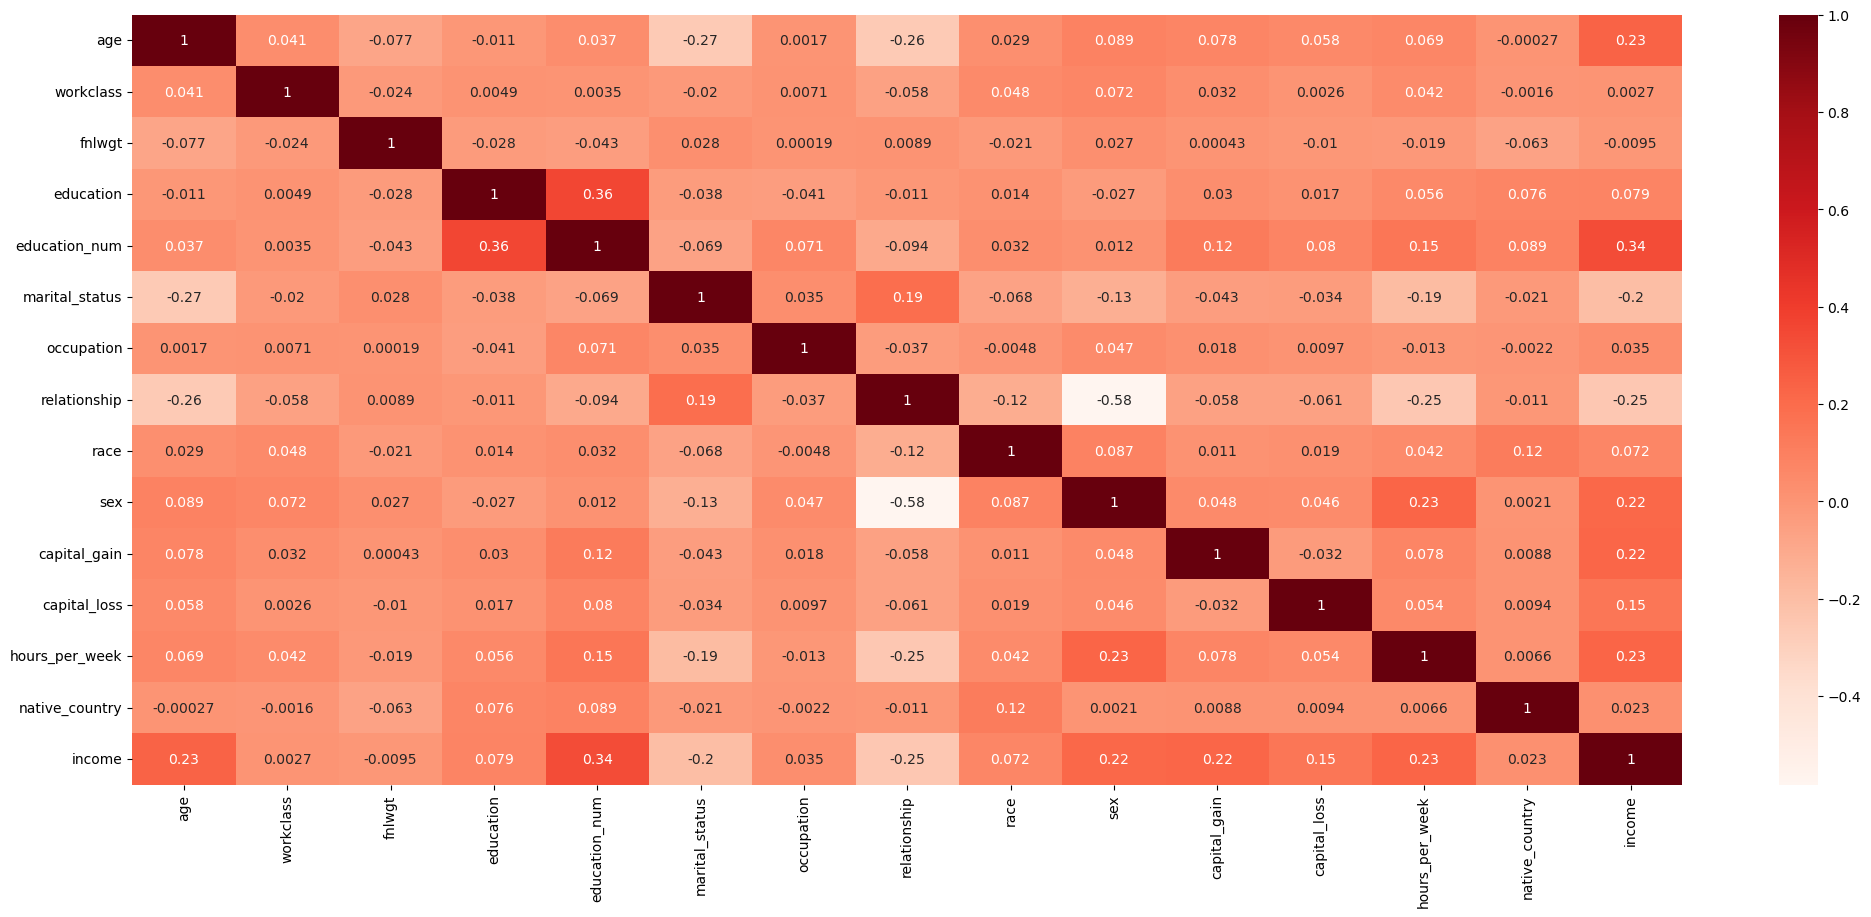

In [66]:
#Using Pearson Correlation

plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [67]:
# Correlation with target variable price

cor_target = abs(cor["income"])

relevant_features = cor_target
relevant_features 

age               0.234037
workclass         0.002693
fnlwgt            0.009463
education         0.079317
education_num     0.335154
marital_status    0.199307
occupation        0.034625
relationship      0.250918
race              0.071846
sex               0.215980
capital_gain      0.223329
capital_loss      0.150526
hours_per_week    0.229689
native_country    0.023058
income            1.000000
Name: income, dtype: float64

##### 7 best features are: 'age', ' education-num', ' marital-status', ' relationship', ' sex', ' capital-gain', ' hours-per-week'

#### b) KBest Features:

In [68]:
x = data_scaled.drop(['workclass', 'occupation', 'race', 'capital_loss', 'native_country',
       'income'],1)  #Feature Matrix
                     
y = data_scaled["income"]          #Target Variable

In [69]:
# importing KBest and f_classifier from sklearn library with k=7

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=7)
X_important = selector.fit_transform(x, y)
mask = selector.get_support()
important_feature_names = x.columns[mask]

print(important_feature_names)

Index(['age', 'education_num', 'marital_status', 'relationship', 'sex',
       'capital_gain', 'hours_per_week'],
      dtype='object')


In [70]:
# assigning input variable as 'x' and target variable as 'y'

x = data_scaled.drop(['workclass', 'occupation', 'race', 'capital_loss', 'native_country',
       'income'],1)  #Feature Matrix
                     
y = data_scaled["income"]          #Target Variable

### Splitting data into Training and Testing sets

In [71]:
# Splitting the data into training and testing set with ration of 80-20% respectively.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=46)

## 3) Building models and evaluating their performances

In [72]:
# importing evaluating parameters from sklearn library.

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

### (A) Support Vector Machines

In [73]:
from sklearn.model_selection import KFold, cross_val_score


clf = SVC(kernel='linear', C=1.0, random_state=42)

# perform cross-validation to check for overfitting
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross-validation scores:", scores)

# Performance of the model Check from accuracy, precision, recall and F1 score 
clf.fit(x_train, y_train)

svm_y_pred = clf.predict(x_test)

svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("Accuracy: %.2f%%" % (svm_accuracy*100))

svm_precision = precision_score(y_test, svm_y_pred, average='macro')
print("Precision: %.2f%%" % (svm_precision*100))

svm_recall = recall_score(y_test, svm_y_pred, average='macro')
print("Recall: %.2f%%" % (svm_recall*100))

svm_f1_score = f1_score(y_test, svm_y_pred, average='macro')
print("F1-score: %.2f%%" % (svm_f1_score*100))

svm_metrics = [svm_accuracy, svm_precision, svm_recall,svm_f1_score]

Cross-validation scores: [0.80268714 0.80690979 0.81209213 0.80840852 0.8093684 ]
Accuracy: 81.08%
Precision: 84.21%
Recall: 61.70%
F1-score: 63.55%


##### Support Vector Machines with pipeline

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# create pipeline with two steps: scaling and SVM classifier
clf_pipe = Pipeline([('scaler', StandardScaler()),
                    ('clf', SVC(kernel='linear', C=1.0))])

# fit the pipeline to your training data & train the model
clf_pipe.fit(x_train, y_train)

# Predicting label values of the testing set
svm_y_pred_pipe = clf_pipe.predict(x_test)

# Performance of the model Check from accuracy, precision, recall and F1 score
svm_accuracy_pipeline = accuracy_score(y_test, svm_y_pred_pipe)
print("Accuracy: %.2f%%" % (svm_accuracy_pipeline * 100.0))

svm_precision_pipeline = precision_score(y_test, svm_y_pred_pipe, average='macro')
print("Precision: %.2f%%" % (svm_precision_pipeline*100))

svm_recall_pipeline = recall_score(y_test, svm_y_pred_pipe, average='macro')
print("Recall: %.2f%%" % (svm_recall_pipeline*100))

svm_f1_score_pipeline = f1_score(y_test, svm_y_pred_pipe, average='macro')
print("F1-score: %.2f%%" % (svm_f1_score_pipeline*100))

svm_metrics_pipeline = [svm_accuracy_pipeline, svm_precision_pipeline, svm_recall_pipeline, svm_f1_score_pipeline]

Accuracy: 80.55%
Precision: 82.86%
Recall: 60.73%
F1-score: 62.19%


In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# create pipeline with two steps: scaling and SVM classifier
clf_pipe = Pipeline([('scaler', StandardScaler()),
                    ('clf', SVC(kernel='poly', C=1.0))])

# fit the pipeline to your training data & train the model
clf_pipe.fit(x_train, y_train)

# Predicting label values of the testing set
svm_y_pred_pipe = clf_pipe.predict(x_test)

# Performance of the model Check from accuracy, precision, recall and F1 score
svm_accuracy_pipeline = accuracy_score(y_test, svm_y_pred_pipe)
print("Accuracy: %.2f%%" % (svm_accuracy_pipeline * 100.0))

svm_precision_pipeline = precision_score(y_test, svm_y_pred_pipe, average='macro')
print("Precision: %.2f%%" % (svm_precision_pipeline*100))

svm_recall_pipeline = recall_score(y_test, svm_y_pred_pipe, average='macro')
print("Recall: %.2f%%" % (svm_recall_pipeline*100))

svm_f1_score_pipeline = f1_score(y_test, svm_y_pred_pipe, average='macro')
print("F1-score: %.2f%%" % (svm_f1_score_pipeline*100))

svm_metrics_pipeline = [svm_accuracy_pipeline, svm_precision_pipeline, svm_recall_pipeline, svm_f1_score_pipeline]

Accuracy: 83.96%
Precision: 79.64%
Recall: 73.13%
F1-score: 75.45%


**Support Vector Machine with pipeline is having less accuracy**.

### (B) Decision Tree

In [76]:
#Import libraries for DecisionTree
from sklearn.tree import DecisionTreeClassifier

# create a Decision Tree Classifier and fitting the training data to it.
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

# create a variable to save the predicted values
dt_y_pred=dt.predict(x_test)

# Random Search

### Randomsearch is use to find best parameters with the help of max_depth, min_samples_split, min_samples_leaf, criterion for DT

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the decision tree classifier
dt=DecisionTreeClassifier()




# Define the hyperparameter search space
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 10),  # Randomly sample max_depth from 1 to 20
    'min_samples_split': randint(2, 7),  # Randomly sample min_samples_split from 2 to 10
    'min_samples_leaf': randint(1, 7),  # Randomly sample min_samples_leaf from 1 to 10
    'max_features': ['sqrt', 'log2', None, randint(1, x.shape[1]+1)]  # Randomly sample max_features
}


# Perform random search with cross-validation
n_iter_search = 30  # Number of random samples to draw
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=n_iter_search, cv=5)
random_search.fit(x, y)

# Print the best hyperparameters and model score
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Model Score: ", random_search.best_score_)


Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best Model Score:  0.8491141323476652


In [78]:
# Put the values of best parameters for DT for random search

# Define the decision tree classifier with its best parameters
dt_outputR =  DecisionTreeClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=5, criterion='entropy')

# Train the model 
dt_outputR.fit(x_train, y_train)

# Use on x_test
dt_bestparam_y_pred = dt_outputR.predict(x_test)


# confusion metrix
from sklearn.metrics import confusion_matrix             # Confusino metrix helps to perform precision, recall and accuracy 
confusion_matrix(y_test, dt_bestparam_y_pred)


# Evalute the DT model with best parameters
dt_bestparam_accuracy = accuracy_score(y_test, dt_bestparam_y_pred)
print("Accuracy: %.2f%%" % (dt_bestparam_accuracy  * 100.0))

dt_bestparam_precision = precision_score(y_test, dt_bestparam_y_pred, average='macro')
print("Precision: %.2f%%" % (dt_bestparam_precision  * 100.0))

dt_bestparam_recall = recall_score(y_test, dt_bestparam_y_pred, average='macro')
print("Recall: %.2f%%" % ( dt_bestparam_recall * 100.0))

dt_bestparam_f1_score = f1_score(y_test, dt_bestparam_y_pred, average='macro')
print("F1-score: %.2f%%" % (dt_bestparam_f1_score*100.00 ))

dt_metrics = [dt_bestparam_accuracy, dt_bestparam_precision, dt_bestparam_recall,dt_bestparam_f1_score]

Accuracy: 84.72%
Precision: 81.82%
Recall: 73.17%
F1-score: 76.00%


# GridsearchCV
GridsearchCV function use to find the best estimators with the help of criterion, max_depth, min_sample_leaf for DT model¶

In [79]:
# importing gridsearch library
from sklearn.model_selection import GridSearchCV  

# Define the decision tree classifier
dt=DecisionTreeClassifier()

# Define the grid parameters
parameter = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4,5,6],
    'min_samples_split': [2,3,4,5,10],  
    }

# Perform grid search cross-validation to find the best hyperparameters
gs = GridSearchCV(dt,
                  scoring=['accuracy','precision','recall','f1'] ,
                  param_grid=parameter, refit= 'accuracy',
                  cv=3)

gs.fit(x_train,y_train)

# Best Estimators for the model
print('best estimator is : ', gs.best_estimator_)
print('best Parameter is : ', gs.best_params_)
print('DT model in accuracy is : ', gs.best_score_)


best estimator is :  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=10)
best Parameter is :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}
DT model in accuracy is :  0.8477811238541819


In [80]:
# Put the values of best parameters for DT for Grid search

# Define the decision tree classifier with its best parameters
dt_output =  DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=3, criterion='entropy')

# Train the model 
dt_output.fit(x_train, y_train)

# Use on x_test
dt_bestparam_y_pred = dt_output.predict(x_test)


# confusion metrix
from sklearn.metrics import confusion_matrix             # Confusino metrix helps to perform precision, recall and accuracy 
confusion_matrix(y_test, dt_bestparam_y_pred)


# Evalute the DT model with best parameters
dt_bestparam_accuracy = accuracy_score(y_test, dt_bestparam_y_pred)
print("Accuracy: %.2f%%" % (dt_bestparam_accuracy  * 100.0))

dt_bestparam_precision = precision_score(y_test, dt_bestparam_y_pred, average='macro')
print("Precision: %.2f%%" % (dt_bestparam_precision  * 100.0))

dt_bestparam_recall = recall_score(y_test, dt_bestparam_y_pred, average='macro')
print("Recall: %.2f%%" % ( dt_bestparam_recall * 100.0))

dt_bestparam_f1_score = f1_score(y_test, dt_bestparam_y_pred, average='macro')
print("F1-score: %.2f%%" % (dt_bestparam_f1_score*100.00 ))

dt_metrics = [dt_bestparam_accuracy, dt_bestparam_precision, dt_bestparam_recall,dt_bestparam_f1_score]

Accuracy: 84.60%
Precision: 79.74%
Recall: 75.84%
F1-score: 77.45%


### (C) Random Forest Classifier  (Ensemble model)

In [81]:
# importing Random Forest Classifier(Ensemble model) library

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
rf = RandomForestClassifier()

# Use KFold cross-validation to compute training scores
cv = KFold(n_splits=5, shuffle=True, random_state=42)
train_scores = cross_val_score(rf, x_train, y_train, cv=cv)


params = {
    'n_estimators': 100,
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': 'auto',
    'random_state': 42
}

rf = RandomForestClassifier(**params)
rf.fit(x_train, y_train)
test_score = rf.score(x_test, y_test)

# Print the scores to check for overfitting
print("If training score is much larger than testing score, the model is overfitting.")
print("Training scores:", train_scores)
print("Mean training score:", train_scores.mean())
print("Test score:", test_score)

If training score is much larger than testing score, the model is overfitting.
Training scores: [0.82802303 0.83666027 0.83378119 0.83739681 0.82434248]
Mean training score: 0.8320407577465401
Test score: 0.8484569322892677


In [82]:
# make predictions on the test data
rf_y_pred = rf.predict(x_test)

# evaluate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))

rf_precision = precision_score(y_test, rf_y_pred, average='macro')
print("Precision: %.2f%%" % (rf_precision * 100.0))

rf_recall = recall_score(y_test, rf_y_pred, average='macro')
print("Recall: %.2f%%" % (rf_recall * 100.0))


rf_f1_score = f1_score(y_test, rf_y_pred, average='macro')
print("F1-score: %.2f%%" % (rf_f1_score * 100.0))


rf_metrics =[rf_accuracy, rf_precision,rf_recall, rf_f1_score ]

Accuracy: 84.85%
Precision: 82.31%
Recall: 73.08%
F1-score: 76.03%


##### Random Forest Classifier (Ensemble model) with pipeline

In [83]:
# Create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([('Scaler1',StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators= 100,
    max_depth= 10,
    min_samples_split= 5,
    min_samples_leaf= 3,
    random_state= None))
])

In [84]:
# Fit the pipeline to the training data
rf_clf_pipe.fit(x_train, y_train)

Pipeline(steps=[('Scaler1', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                        min_samples_split=5))])

In [85]:
# Predict on the test data
rf_y_pred_p = rf_clf_pipe.predict(x_test)

In [86]:
# evaluate the accuracy of the classifier
rf_accuracy_pipe = accuracy_score(y_test, rf_y_pred_p)
print("Accuracy: %.2f%%" % (rf_accuracy_pipe * 100.0))

rf_precision_pipe = precision_score(y_test, rf_y_pred_p, average='macro')
print("Precision: %.2f%%" % (rf_precision_pipe * 100.0))

rf_recall_pipe = recall_score(y_test, rf_y_pred_p, average='macro')
print("Recall: %.2f%%" % (rf_recall_pipe * 100.0))


rf_f1_score_pipe = f1_score(y_test, rf_y_pred_p, average='macro')
print("F1-score: %.2f%%" % (rf_f1_score_pipe * 100.0))


rf_metrics_pipe =[rf_accuracy_pipe, rf_precision_pipe,rf_recall_pipe, rf_f1_score_pipe ]

Accuracy: 85.18%
Precision: 81.59%
Recall: 75.10%
F1-score: 77.49%


In [87]:
# Create the pipeline-2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([('Scaler1',StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators= 100,
    max_depth= 8,
    min_samples_split= 3,
    min_samples_leaf= 3,
    random_state= 50))
])

In [88]:
# Fit the pipeline to the training data
rf_clf_pipe.fit(x_train, y_train)

Pipeline(steps=[('Scaler1', StandardScaler()),
                ('clf',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=3,
                                        min_samples_split=3,
                                        random_state=50))])

In [89]:
# Predict on the test data
rf_y_pred_p = rf_clf_pipe.predict(x_test)

In [90]:
# evaluate the accuracy of the classifier
rf_accuracy_pipe = accuracy_score(y_test, rf_y_pred_p)
print("Accuracy: %.2f%%" % (rf_accuracy_pipe * 100.0))

rf_precision_pipe = precision_score(y_test, rf_y_pred_p, average='macro')
print("Precision: %.2f%%" % (rf_precision_pipe * 100.0))

rf_recall_pipe = recall_score(y_test, rf_y_pred_p, average='macro')
print("Recall: %.2f%%" % (rf_recall_pipe * 100.0))


rf_f1_score_pipe = f1_score(y_test, rf_y_pred_p, average='macro')
print("F1-score: %.2f%%" % (rf_f1_score_pipe * 100.0))


rf_metrics_pipe =[rf_accuracy_pipe, rf_precision_pipe,rf_recall_pipe, rf_f1_score_pipe ]

Accuracy: 84.89%
Precision: 82.15%
Recall: 73.39%
F1-score: 76.26%


**In random forest classfiers, model with pipeline is having more accuracy.**

### (D) K-Nearest Neighbors (KNN)

In [91]:
# Importing libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# create a variable to save the predicted values
knn_y_pred=knn.predict(x_test)

In [92]:
# Calculate the evaluation metrics for KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy: %.2f%%" % (knn_accuracy * 100.0))


knn_precision = precision_score(y_test, knn_y_pred, average='macro')
print("Precision: %.2f%%" % (knn_precision * 100.0))

knn_recall = recall_score(y_test, knn_y_pred, average='macro')
print("Recall: %.2f%%" % (knn_recall * 100.0))


knn_f1_score = f1_score(y_test, knn_y_pred, average='macro')
print("F1-score: %.2f%%" % (knn_f1_score * 100.0))

knn_metrics=[knn_accuracy,knn_precision, knn_recall,knn_f1_score]

Accuracy: 82.50%
Precision: 76.28%
Recall: 73.53%
F1-score: 74.70%


In [93]:
# set the value for the number of neighbors
n_neighbors = 7

# create a KNN classifier with the specified hyperparameters and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train, y_train)

# create a variable to save the predicted values
knn_y_pred = knn.predict(x_test)

# Calculate the evaluation metrics for KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy: %.2f%%" % (knn_accuracy * 100.0))

knn_precision = precision_score(y_test, knn_y_pred, average='macro')
print("Precision: %.2f%%" % (knn_precision * 100.0))

knn_recall = recall_score(y_test, knn_y_pred, average='macro')
print("Recall: %.2f%%" % (knn_recall * 100.0))

knn_f1_score = f1_score(y_test, knn_y_pred, average='macro')
print("F1-score: %.2f%%" % (knn_f1_score * 100.0))

knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]

Accuracy: 82.63%
Precision: 76.57%
Recall: 73.40%
F1-score: 74.72%


In [94]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# create a KNN classifier
knn = KNeighborsClassifier()

# create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# create a KNN classifier with the best hyperparameters and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
knn.fit(x_train, y_train)

# create a variable to save the predicted values
knn_y_pred = knn.predict(x_test)

# Calculate the evaluation metrics for KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy: %.2f%%" % (knn_accuracy * 100.0))

knn_precision = precision_score(y_test, knn_y_pred, average='macro')
print("Precision: %.2f%%" % (knn_precision * 100.0))

knn_recall = recall_score(y_test, knn_y_pred, average='macro')
print("Recall: %.2f%%" % (knn_recall * 100.0))

knn_f1_score = f1_score(y_test, knn_y_pred, average='macro')
print("F1-score: %.2f%%" % (knn_f1_score * 100.0))

knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]

Accuracy: 82.77%
Precision: 76.86%
Recall: 73.34%
F1-score: 74.78%


### (E) Logistic Regression

In [95]:
# Importing logistic regression libraries.

from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression().fit(x_train, y_train)

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Assigning ypred 
lr_y_pred = lrmodel.predict(x_test)

accuracy_score(lr_y_pred, y_test)

0.8217411331183786

In [97]:
# Print the confusion matrix
confusion_matrix(y_test, lr_y_pred)

array([[4675,  277],
       [ 884,  677]], dtype=int64)

In [98]:
# to check how probabilities related
pypred = lrmodel.predict_proba(x_test)
pypred

array([[0.83985377, 0.16014623],
       [0.64689724, 0.35310276],
       [0.97296036, 0.02703964],
       ...,
       [0.52347944, 0.47652056],
       [0.00797179, 0.99202821],
       [0.17843645, 0.82156355]])

In [99]:
# to change the default threshold and to make it 50% and above
(pypred[:, 1] >= 0.5).astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [100]:
# Set KFold cross-validation
kfold = KFold(n_splits=5)

# Use cross-validation to evaluate the model
lr_scores = cross_val_score(lrmodel, x_train, y_train, cv=kfold)
lr_accuracy=lr_scores.mean()

# Print the accuracy scores for each fold
print("Accuracy scores:", lr_accuracy)

# Print the mean accuracy and standard deviation of the model
print("Mean accuracy: %.2f%%" %(lr_scores.mean()*100))

lr_precision = precision_score(y_test, lr_y_pred, average='macro')
print("Precision: %.2f%%" % (lr_precision * 100.0))

lr_recall = recall_score(y_test, lr_y_pred, average='macro')
print("Recall: %.2f%%" % (lr_recall * 100.0))

lr_f1_score = f1_score(y_test, lr_y_pred, average='macro')
print("F1-score: %.2f%%" % (lr_f1_score * 100.0))
 
print("Standard deviation:", (lr_scores.std()))
      
lr_metrics=[lr_accuracy, lr_precision, lr_recall , lr_f1_score ]

Accuracy scores: 0.8184118731458803
Mean accuracy: 81.84%
Precision: 77.53%
Recall: 68.89%
F1-score: 71.40%
Standard deviation: 0.005496758870135146


### Note:

1. cross-validation uses all the data for training and testing, and averages the results over multiple iterations, which helps to reduce the impact of random variations in the data and due to this reason it is use for good estimation of the model.
<br><br>
2. When targert variable is imbalace then we can perform StratifiedKFold, which is a variation of KFold that preserves the proportion of samples for each class in each fold. StratifiedKFold ensures that each fold is representative of the overall dataset and preserve the class proportion. It will helps to avoid overfitting or underfitting on specific classes.

## 4) ROC curve for each model

In [101]:
# importing library for ROC curve

from sklearn.metrics import roc_curve, roc_auc_score           

In [102]:
 ## Compute FPR and TPR for each model
    
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_pred)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred)
dt_bestparam_fpr, dt_bestparam_tpr, _ = roc_curve(y_test, dt_bestparam_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_y_pred)

In [103]:
# calculate the AUC score for each model

svm_auc = roc_auc_score(y_test, svm_y_pred)
knn_auc = roc_auc_score(y_test, knn_y_pred)
dt_auc = roc_auc_score(y_test, dt_y_pred)
dt_bestparam_auc = roc_auc_score(y_test, dt_bestparam_y_pred)
rf_auc= roc_auc_score(y_test, rf_y_pred)
lr_auc= roc_auc_score(y_test, lr_y_pred)


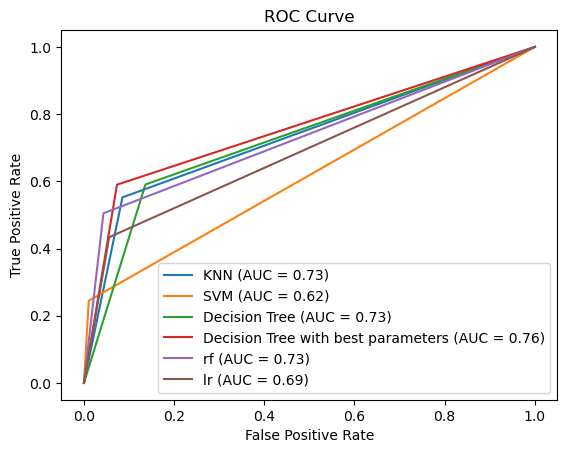

In [104]:
# plot the ROC curve for each model

plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(dt_bestparam_fpr, dt_bestparam_tpr, label=f'Decision Tree with best parameters (AUC = {dt_bestparam_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'rf (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'lr (AUC = {lr_auc:.2f})')


# add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# show the plot
plt.show()


## 5) Performace Parameter for all models

In [105]:
# Assigning accuracy, Precision, Recall and F1-Score for each model.

results_df = pd.DataFrame(data=[svm_metrics, dt_metrics, rf_metrics, knn_metrics, lr_metrics], 
                          columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], 
                          index=['SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression'])
print(results_df)

                     Accuracy  Precision    Recall  F1-score
SVM                  0.810840   0.842091  0.617006  0.635535
Decision Tree        0.846000   0.797448  0.758351  0.774467
Random Forest        0.848457   0.823081  0.730795  0.760286
KNN                  0.827729   0.768557  0.733395  0.747773
Logistic Regression  0.818412   0.775311  0.688880  0.713957


## 6) Model selection & Results analysis

The evaluation measure that we used for model selection for income classification is accuracy.

**Random Forest** is having accuracy of 84.84% which is highest among all the models. As well as from ROC curve, AUC = 0.73.